# House Prices

## Goal

Using 79 features of homes can you guess the house prices of houses in Ames, Iowa.

## Import Libraries

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import re
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import sys
import tarfile
import random
from IPython.display import display, Image
from matplotlib.ticker import MaxNLocator
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from collections import Counter

#Common Machine Learning Algorithms
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Some statistics libarary
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

import warnings
warnings.filterwarnings('ignore')

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

# Set it so it will display all the columns in a pandas dataframe
pd.options.display.max_columns = None

## Read in the Data


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

datasets = [train_data, test_data]

## Shuffle Up The Training Data

In [3]:
datasets[0] = datasets[0].sample(frac=1)

## Take a peek at the Data

In [4]:
datasets[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
294,295,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,HdBoard,HdBoard,Stone,238.0,TA,TA,CBlock,TA,TA,No,GLQ,1285,Unf,0,131,1416,GasA,TA,Y,SBrkr,1644,0,0,1644,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1953.0,Fin,2,418,TA,TA,Y,110,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,167000
213,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,716,Unf,0,274,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1996.0,Unf,2,576,TA,TA,Y,224,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,156000
652,653,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,880,880,GasA,Ex,Y,SBrkr,909,807,0,1716,0,0,2,1,2,1,Gd,7,Typ,1,TA,Attchd,1996.0,RFn,2,512,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,191000
164,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,7,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,TA,Mn,LwQ,370,Unf,0,779,1149,GasA,Gd,Y,FuseA,1149,467,0,1616,0,0,2,0,3,1,Gd,5,Typ,0,NaN,Detchd,1926.0,Unf,1,216,TA,TA,Y,0,0,183,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,152000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500


__SalePrice__ is definetly my target variable

In [5]:
datasets[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 294 to 927
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [6]:
# Will describe all the continuous variable.
datasets[0].describe()

# MSSubClass is a hidden categorical variable
# 3Ssn Porch is the "Three season porch area in square feet"
# MiscVal is the value of miscellaneous features
# MoSold is the Month it was sold. 
# YrSold is the Year it was sold

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Look at my categorical varibles. 
datasets[0].describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## Think about Each Variable

I will think about each variable in this way. 

__Variable__ - Variable name.

__Type__ - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

__Segment__ - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

__Expectation__ - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.

__Conclusion__ - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

__Comments__ - Any general comments that occured to us.

In [8]:
variable_df = pd.DataFrame()

column_name = "MSSubClass"
variable_df.loc[column_name, "Type"] = "numerical"
variable_df.loc[column_name, "Segment"] = "building"
variable_df.loc[column_name, "Expectation"] = "med"
variable_df.loc[column_name, "Conclusion"] = "tbd"
variable_df.loc[column_name, "Comments"] = "Identifies the type of dwelling involved in the sale. 1 Story, 2 Story something like that"

In [9]:
column_name = "LotFrontage"
variable_df.loc[column_name, "Type"] = "numerical"
variable_df.loc[column_name, "Segment"] = "building"
variable_df.loc[column_name, "Expectation"] = "med"
variable_df.loc[column_name, "Conclusion"] = "tbd"
variable_df.loc[column_name, "Comments"] = "Linear feet of street connected to property"

__THE REST OF THESE WERE DONE IN AN EXCEL SHEET FOR CLARITY SAKE__

The outcome is I believe that the important variables are OverallQual, YearBuilt, TotalBsmtSF, Neighborhood and GrLivArea

## Fill in missing values of features

This is a list of all the columns that have Null values.

In [10]:
datasets[0].columns[datasets[0].isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

This function has the purpose of filling in missing values using the mean of the group by of another variable.

In [11]:
def single_groupby_mean_fix(datasets, group_by_variable, fill_in_variable):
    result_datasets = []

    for dataset in datasets:   
        grouped_mean_values = dataset[[fill_in_variable, group_by_variable]].groupby([group_by_variable]).mean()

        index_and_group_by_variable = dataset[dataset[fill_in_variable].isna()][[group_by_variable]]
        index_and_group_by_variable["NAValue"] = grouped_mean_values.loc[index_and_group_by_variable[group_by_variable]].values
        index_and_group_by_variable.drop([group_by_variable], axis=1, inplace=True)

        join_result = dataset.join(with_dropped_column)
        join_result.loc[join_result[fill_in_variable].isna(), fill_in_variable] = join_result['NAValue']
        join_result.drop("NAValue", axis=1, inplace=True)

        result_datasets.append(join_result)
        
    return result_datasets

This function will let you know what percentage of a values in a column have na values. 

In [12]:
def how_much_na(column_name):
    return datasets[0]["Id"][datasets[0][column_name].isna()].count() / datasets[0].shape[0]

### Lot Frontage

In [13]:
how_much_na('LotFrontage')

0.1773972602739726

In [14]:
#group_by_variable = 'Neighborhood'
#fill_in_variable = 'LotFrontage'

#datasets = single_groupby_mean_fix(datasets, group_by_variable, fill_in_variable)

In [15]:
#This is just a much more efficient way of doing what was done before.
datasets[0]["LotFrontage"] = datasets[0][["Neighborhood", "LotFrontage"]].groupby("Neighborhood").transform(lambda x: x.fillna(x.median()))
datasets[1]["LotFrontage"] = datasets[1][["Neighborhood", "LotFrontage"]].groupby("Neighborhood").transform(lambda x: x.fillna(x.median()))

### Alley

In [16]:
how_much_na('Alley')

0.9376712328767123

In [17]:
datasets[0]["Alley"][datasets[0]["Alley"].isna() == False].head(3)

164    Pave
281    Pave
841    Grvl
Name: Alley, dtype: object

In [18]:
result_datasets = []

for dataset in datasets:
    dataset["Alley"].fillna("Unknown", inplace=True)

### MasVnrType (Masonary Veneer Type)

In [19]:
how_much_na('MasVnrType')

0.005479452054794521

In [20]:
mode = datasets[0]["MasVnrType"][datasets[0]["MasVnrType"].isna() == False].mode()

for dataset in datasets:
    dataset["MasVnrType"].fillna(mode[0], inplace=True)

###  MasVnrArea (Masonary Veneer Area)

In [21]:
how_much_na('MasVnrArea')

0.005479452054794521

In [22]:
for dataset in datasets:
    dataset["MasVnrArea"].fillna(0, inplace=True)

### BsmtQual

In [23]:
how_much_na('BsmtQual')

0.025342465753424658

In [24]:
mode = datasets[0]['BsmtQual'].mode()[0]

for dataset in datasets:
    dataset["BsmtQual"].fillna(mode, inplace=True)

### BsmtCond

In [25]:
how_much_na('BsmtCond')

0.025342465753424658

In [26]:
mode = datasets[0]['BsmtCond'].mode()[0]

for dataset in datasets:
    dataset["BsmtCond"].fillna(mode, inplace=True)

### BsmtExposure

In [27]:
how_much_na("BsmtExposure")

0.026027397260273973

In [28]:
mode = datasets[0]["BsmtExposure"].mode()

for dataset in datasets:
    dataset["BsmtExposure"].fillna(mode[0], inplace=True)

### BsmtFinType1

In [29]:
how_much_na("BsmtFinType1")

0.025342465753424658

In [30]:
mode = datasets[0]["BsmtFinType1"].mode()

for dataset in datasets:
    dataset["BsmtFinType1"].fillna(mode[0], inplace=True)

### BsmtFinType2

In [31]:
how_much_na("BsmtFinType2")

0.026027397260273973

In [32]:
mode = datasets[0]["BsmtFinType2"].mode()

for dataset in datasets:
    dataset["BsmtFinType2"].fillna(mode[0], inplace=True)

### Electrical

In [33]:
how_much_na("Electrical")

0.0006849315068493151

In [34]:
mode = datasets[0]["Electrical"].mode()

for dataset in datasets:
    dataset["Electrical"].fillna(mode[0], inplace=True)

### FireplaceQu

In [35]:
how_much_na("FireplaceQu")

0.4726027397260274

In [36]:
datasets[0][["Fireplaces", "FireplaceQu"]].head()

,Fireplaces,FireplaceQu
294,2,Gd
213,0,NaN
652,1,TA
164,0,NaN
250,0,NaN


In [37]:
datasets[0][datasets[0]["FireplaceQu"].isna()][datasets[0]["Fireplaces"] != 0][["Fireplaces", "FireplaceQu"]].count()

Fireplaces     0
FireplaceQu    0
dtype: int64

What this tells us is all the fireplaceQu values that are NA are because the house does not actually have a fireplace.

In [38]:
for dataset in datasets:
    dataset["FireplaceQu"].fillna("None", inplace=True)

### GarageType

In [39]:
how_much_na("GarageType")

0.05547945205479452

I personally think that if someone has no Garage Type that means they have no garage. I conclude this becuase if some one has no GarageYrBuilt then they always have an NA GarageType

In [40]:
for dataset in datasets:
    dataset["GarageType"].fillna("NoGarage", inplace=True)
# How do I move index into a column

### GarageYrBlt

In [41]:
how_much_na("GarageYrBlt")

0.05547945205479452

In [42]:
datasets[0][datasets[0]["GarageYrBlt"].isna()][["GarageYrBlt", "GarageType"]].head(5)

,GarageYrBlt,GarageType
250,NaN,NoGarage
710,NaN,NoGarage
843,NaN,NoGarage
287,NaN,NoGarage
198,NaN,NoGarage


In [43]:
# Set it to some dummy value
for dataset in datasets:
    dataset["GarageYrBlt"].fillna("-1", inplace=True)

### GarageFinish

I am realizing now that __ALL__ of the garage variables are set to None if there is no garage

In [44]:
for dataset in datasets:
    dataset["GarageFinish"].fillna("NoGarage", inplace=True)

### GarageQual

In [45]:
for dataset in datasets:
    dataset["GarageQual"].fillna("NoGarage", inplace=True)

### GarageCond

In [46]:
how_much_na("GarageCond")

0.05547945205479452

In [47]:
for dataset in datasets:
    dataset["GarageCond"].fillna(-1, inplace=True)

### PoolQC

In [48]:
how_much_na("PoolQC")

0.9952054794520548

I'm going to assuming if there is no PoolQC it is because there is actually no pool. This is because of the super high NA value percentage.

In [49]:
for dataset in datasets:
    dataset["PoolQC"].fillna(-1, inplace=True)

### Fence

In [50]:
how_much_na("Fence")

0.8075342465753425

In [51]:
for dataset in datasets:
    dataset["Fence"].fillna("NoFence", inplace=True)

### MiscFeatures

In [52]:
how_much_na("MiscFeature")

0.963013698630137

In [53]:
for dataset in datasets:
    dataset["MiscFeature"].fillna("NoMiscFeature", inplace=True)

Don't mind me... forgot to do some variables that only have NAs in the submission dataset

In [54]:
datasets[1]["TotalBsmtSF"][datasets[1]["TotalBsmtSF"].isna()] = 0
datasets[1]["LotFrontage"][datasets[1]["LotFrontage"].isna()] = datasets[1]["LotFrontage"].median()
datasets[1]["BsmtFinSF1"][datasets[1]["BsmtFinSF1"].isna()] = 0
datasets[1]["BsmtFinSF2"][datasets[1]["BsmtFinSF2"].isna()] = 0
datasets[1]["BsmtUnfSF"][datasets[1]["BsmtUnfSF"].isna()] = 0
datasets[1]["BsmtFullBath"][datasets[1]["BsmtFullBath"].isna()] = 0
datasets[1]["BsmtHalfBath"][datasets[1]["BsmtHalfBath"].isna()] = 0
datasets[1]["GarageCars"][datasets[1]["GarageCars"].isna()] = 0
datasets[1]["GarageArea"][datasets[1]["GarageArea"].isna()] = 0

### Double Check Everything

In [55]:
datasets[0].columns[datasets[0].isna().any()]

Index([], dtype='object')

Sweet there are no longer any NA values in my dataframe. 

## Remove Outliers

This is for practice more than anything.

In [56]:
# Use the Tukey fences method for removing outliers
columns = ["LotFrontage", "LotArea", "SalePrice"]
outlier_indicies = []
number_of_outliers_needed = 2

dataset = datasets[0]

for column in columns:
    Q1 = np.percentile(dataset[column], 25)
    Q3 = np.percentile(dataset[column], 75)
    IQR = Q3 - Q1
    
    outlier_step = IQR * 1.5
    
    lower_bound = Q1 - outlier_step
    upper_bound = Q3 + outlier_step
    
    outlier_list_for_column = dataset[(dataset[column] > upper_bound) | (dataset[column] < lower_bound)].index
    
    outlier_indicies.extend(outlier_list_for_column)
    

outlier_indicies = Counter(outlier_indicies)        
multiple_outliers = list( k for k, v in outlier_indicies.items() if v > number_of_outliers_needed )

dataset.loc[multiple_outliers]

dataset = dataset.drop(multiple_outliers, axis=0)
dataset.reset_index(drop=True).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,295,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,CompShg,HdBoard,HdBoard,Stone,238.0,TA,TA,CBlock,TA,TA,No,GLQ,1285,Unf,0,131,1416,GasA,TA,Y,SBrkr,1644,0,0,1644,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1953,Fin,2,418,TA,TA,Y,110,0,0,0,0,0,-1,NoFence,NoMiscFeature,0,10,2009,WD,Normal,167000
1,214,20,RL,43.0,13568,Pave,Unknown,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,716,Unf,0,274,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,None,Attchd,1996,Unf,2,576,TA,TA,Y,224,0,0,0,0,0,-1,NoFence,NoMiscFeature,0,7,2006,WD,Normal,156000
2,653,60,RL,70.0,8750,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,880,880,GasA,Ex,Y,SBrkr,909,807,0,1716,0,0,2,1,2,1,Gd,7,Typ,1,TA,Attchd,1996,RFn,2,512,TA,TA,Y,0,120,0,0,0,0,-1,NoFence,NoMiscFeature,0,7,2009,WD,Normal,191000
3,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,7,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,TA,Mn,LwQ,370,Unf,0,779,1149,GasA,Gd,Y,FuseA,1149,467,0,1616,0,0,2,0,3,1,Gd,5,Typ,0,None,Detchd,1926,Unf,1,216,TA,TA,Y,0,0,183,0,0,0,-1,NoFence,NoMiscFeature,0,10,2007,WD,Normal,152000
4,251,30,RL,55.0,5350,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,None,NoGarage,-1,NoGarage,0,0,NoGarage,-1,Y,263,0,0,0,0,0,-1,GdWo,Shed,450,5,2010,WD,Normal,76500


## Check the importance of independent features and Feature Engineering

Let's check some of the basics first. Let's just graph sales price first.

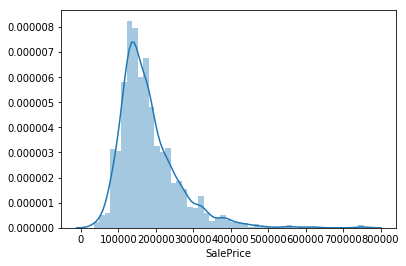

In [57]:
sns.distplot(datasets[0]["SalePrice"])

I wonder if I logged SalePrice what that would look like?

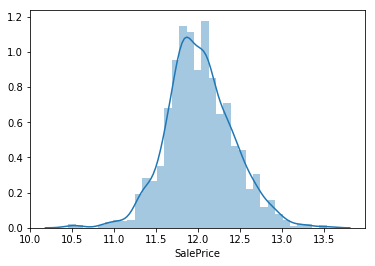

In [58]:
logged_sale_price = np.log(datasets[0]["SalePrice"])
sns.distplot(logged_sale_price)

In [59]:
grouped_mean = datasets[0][["SalePrice", "MSSubClass"]].groupby("MSSubClass").mean()
grouped_count = datasets[0][["SalePrice", "MSSubClass"]].groupby("MSSubClass").count()
grouped_count.columns = ["SalePriceCount"]
grouped_combined = grouped_count.join(grouped_mean)
grouped_combined.sort_values('SalePrice', ascending=False)

,SalePriceCount,SalePrice
MSSubClass,,
60,299,239948.501672
120,87,200779.080460
75,16,192437.500000
20,536,185224.811567
80,58,169736.551724
70,60,166772.416667
40,4,156125.000000
85,20,147810.000000
50,144,143302.972222


In [60]:
datasets[0][["MSZoning", "SalePrice"]].groupby("MSZoning").mean()

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


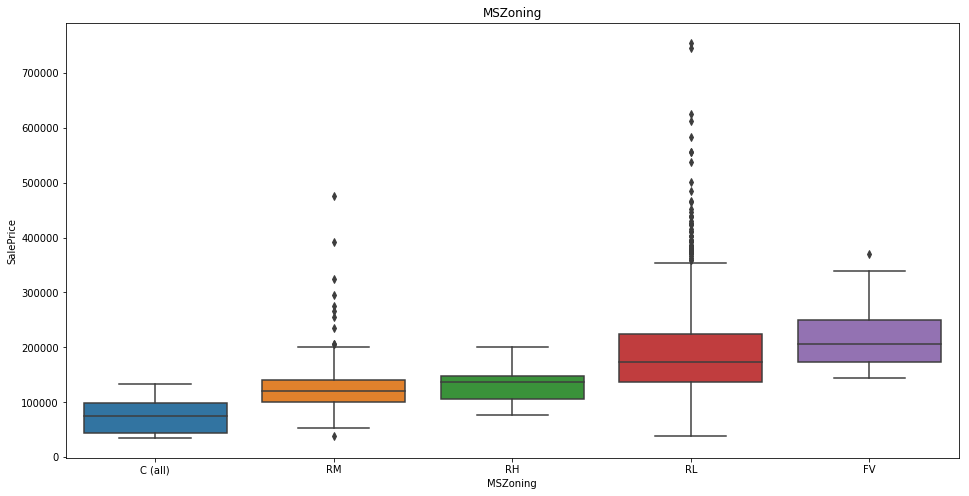

In [61]:
fix, axes = plt.subplots(1, 1, figsize=(16,8))

axes.set_title("MSZoning")
orderby_order = datasets[0][["MSZoning", "SalePrice"]].groupby("MSZoning").mean().sort_values("SalePrice").index
sns.boxplot(x=datasets[0]["MSZoning"], y=datasets[0]["SalePrice"], ax=axes, order=orderby_order)

Let's look at __OverallQual__. Let's use a boxplot to visualize this.

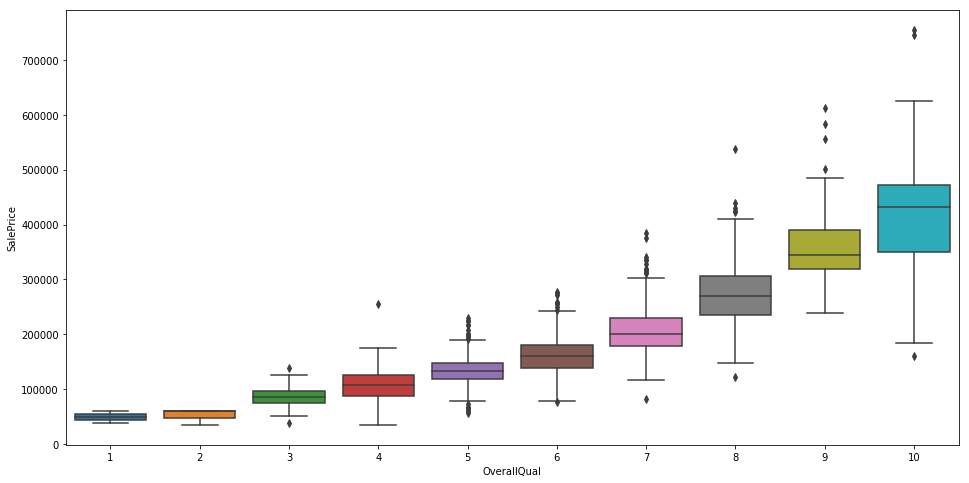

In [62]:
fix, axes = plt.subplots(1, 1, figsize=(16,8))

sales_price = datasets[0]["SalePrice"]
overall_qual = datasets[0]["OverallQual"]

sns.boxplot(y=sales_price, x=overall_qual, ax=axes)

Let's look aty __YearBuilt__ next. We can use a scatter plot or something similar.

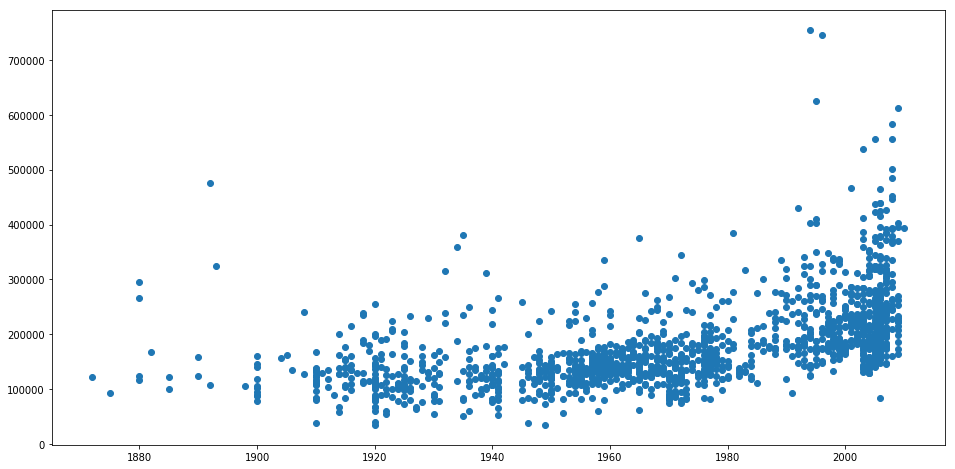

In [63]:
year_built = datasets[0]["YearBuilt"]
sale_price = datasets[0]["SalePrice"]

fig, axes = plt.subplots(1, 1, figsize=(16,8))

plt.scatter(year_built, sale_price)

Lets do __TotalBsmtSF__. We can use a scatter plot for this.

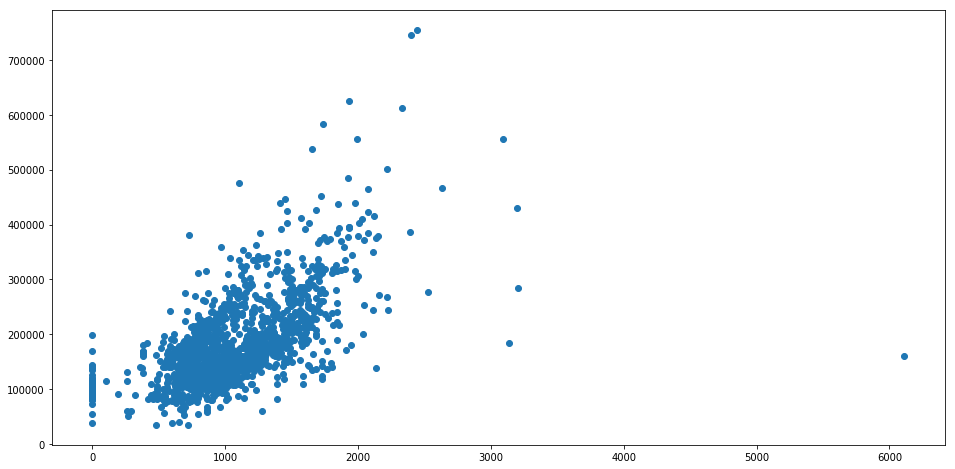

In [64]:
year_built = datasets[0]["TotalBsmtSF"]
sale_price = datasets[0]["SalePrice"]

fig, axes = plt.subplots(1, 1, figsize=(16,8))

plt.scatter(year_built, sale_price)

K I want to look at the row that more than 6000 sq of basement space. WTF

In [65]:
datasets[0][datasets[0]["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,Unknown,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NoFence,NoMiscFeature,0,1,2008,New,Partial,160000


Let's look at the __GrLivArea__.

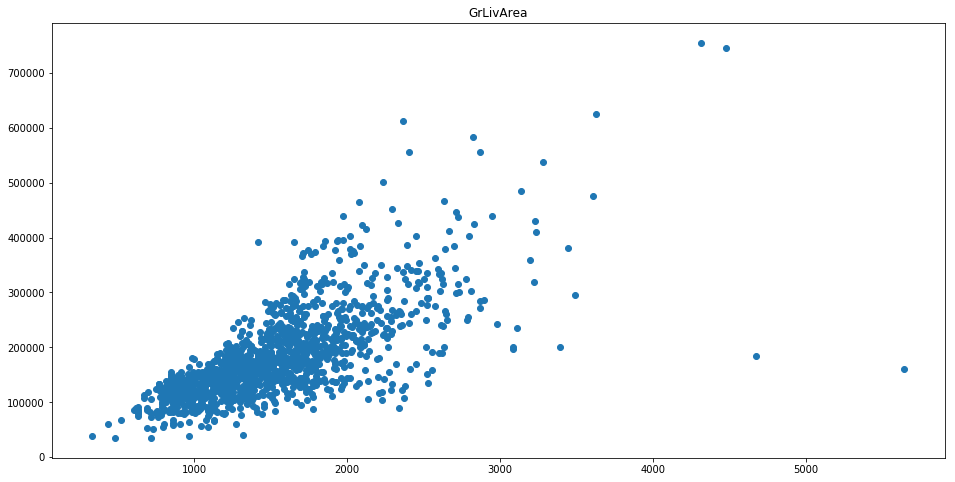

In [66]:
year_built = datasets[0]["GrLivArea"]
sale_price = datasets[0]["SalePrice"]

fig, axes = plt.subplots(1, 1, figsize=(16,8))
axes.set_title("GrLivArea")

plt.scatter(year_built, sale_price)

One thing that sticks out about the above graph is that the two houses with the highest General Living Area do not actually have high prices, these worry me so I will go ahead and delete them. I think they maybe be some weird edge cases. Maybe we are counting a barn as living space or something.

In [67]:
to_drop = datasets[0].iloc[datasets[0]["GrLivArea"].argsort()[-2:]][["GrLivArea", "SalePrice"]].index
datasets[0].drop(to_drop, axis=0, inplace=True)

Let's graph that again and see what it looks like.

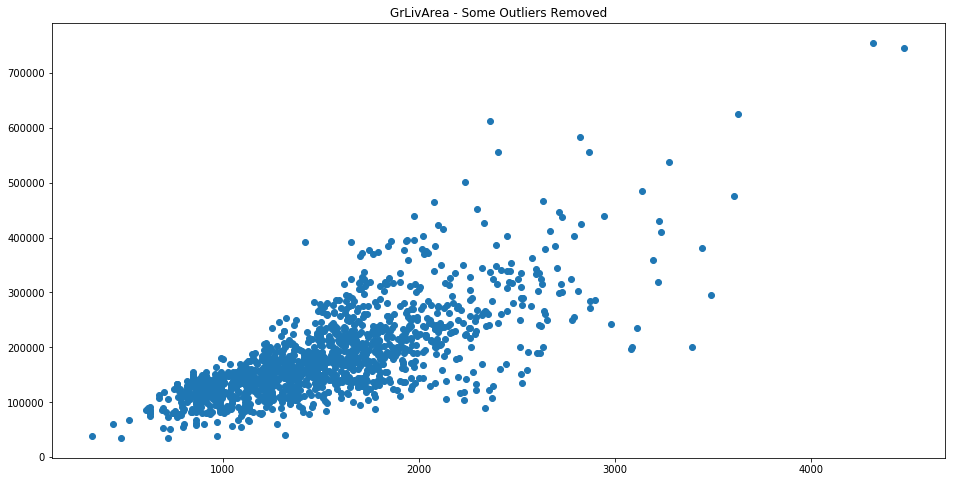

In [68]:
year_built = datasets[0]["GrLivArea"]
sale_price = datasets[0]["SalePrice"]

fig, axes = plt.subplots(1, 1, figsize=(16,8))
axes.set_title("GrLivArea - Some Outliers Removed")

plt.scatter(year_built, sale_price)

Makes much more sense now!

Let's look at the __Neighborhood__ graph now. I think this should make a difference. 

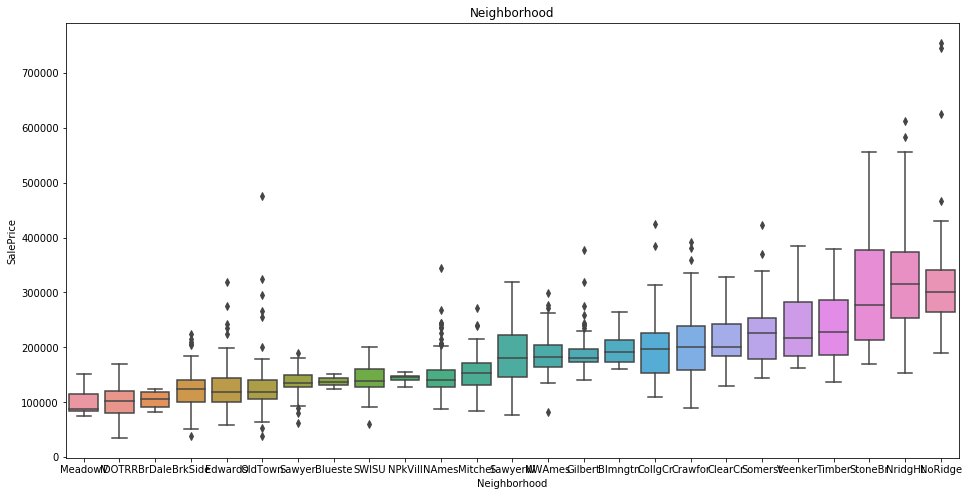

In [69]:
fix, axes = plt.subplots(1, 1, figsize=(16,8))

axes.set_title("Neighborhood")
orderby_order = datasets[0][["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values("SalePrice").index
sns.boxplot(x=datasets[0]["Neighborhood"], y=datasets[0]["SalePrice"], ax=axes, order=orderby_order)

Let's just look at the distribution of the LotFrontage for fun. We can try out some binning techniques.

In [70]:
#ignore for now
#datasets[0]["LotFrontageQBinned"] = pd.qcut(datasets[0]["LotFrontage"], 6)

#label = LabelEncoder()
#datasets[0]['LotFrontage_Coded'] = label.fit_transform(datasets[0]['LotFrontageQBinned'])

## Turn some numerical variables into categorical

In [71]:
for dataset in datasets:    
    #MSSubClass=The building class
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

    #Changing OverallCond into a categorical variable
    dataset['OverallCond'] = dataset['OverallCond'].astype(str)

    #Year and month sold are transformed into categorical features.
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)

## Check the correlation of different variables.

Look at the correlation of some of the data.

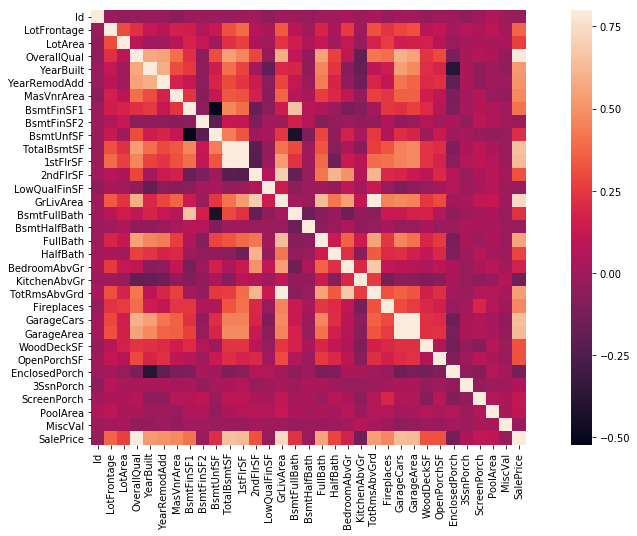

In [72]:
corr = datasets[0].corr()
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(corr, vmax=0.8, square=True)

From here we can see that serveral things are correlated. (GarageArea, GarageCars), (TotalRmsAboveGround, TotalLivArea), etc.

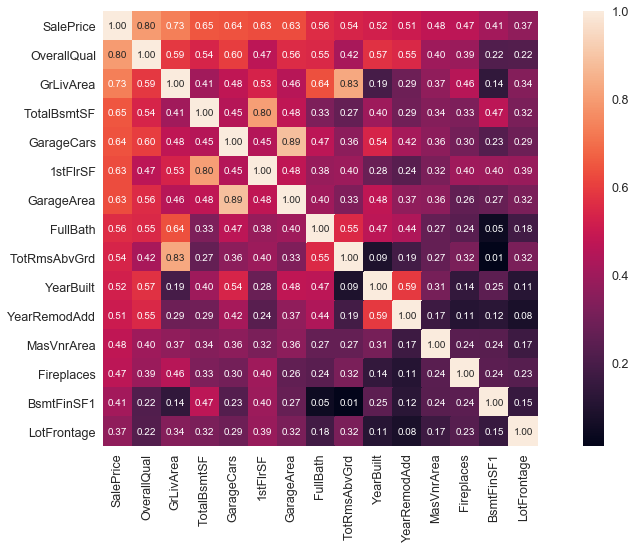

In [73]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice').index
cm = np.corrcoef(datasets[0][cols].values.T)
sns.set(font_scale=1.25)
fig, axes = plt.subplots(1, 1, figsize=(16,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=axes)
plt.show()

Just going to go ahead a build a feature quickly that should tally up all the Area.

In [74]:
datasets[0]["TotalLivArea"] = datasets[0]["GrLivArea"] + datasets[0]["1stFlrSF"] + datasets[0]["2ndFlrSF"] + datasets[0]["TotalBsmtSF"]
datasets[1]["TotalLivArea"] = datasets[1]["GrLivArea"] + datasets[1]["1stFlrSF"] + datasets[1]["2ndFlrSF"] + datasets[1]["TotalBsmtSF"]

After some analysis turns out this feature is not very usefull.

Let's look at how some of the values are distributed.

In [75]:
print(datasets[0]["SalePrice"].describe())
print("-" * 30)
print(datasets[0]["OverallQual"].describe())

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
------------------------------
count    1458.000000
mean        6.093964
std         1.376369
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


In [76]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(datasets[0]['SalePrice'][:,np.newaxis]);

saleprice_scaled[:, 0].sort()
print(saleprice_scaled[:, 0][:10])
print(saleprice_scaled[:, 0][-10:])

[-1.83763662 -1.83246471 -1.79988548 -1.78226827 -1.77345967 -1.6224551
 -1.61616324 -1.58470395 -1.58470395 -1.57220832]
[3.82629346 4.03816547 4.49323035 4.7071535  4.72704835 5.05865441
 5.42010904 5.58801355 7.09805933 7.22389648]


Looking at this to me it seems like the smaller house prices are actually pretty close to the mean but the houses with the greatest prices are much larger than the average house.

## Combine our datasets

In [77]:
ntrain = datasets[0].shape[0]
ntest = datasets[1].shape[0]

all_data = pd.concat((datasets[0], datasets[1])).reset_index(drop=True)

## Feature Removal.

I will mainly keep things from my correlation matrix.

In [78]:
columns_to_keep = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageCars", "1stFlrSF",\
                   "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "MasVnrArea", \
                  "Fireplaces", "BsmtFinSF1", "LotFrontage"]

target_column = ["SalePrice"]

final_id_column = datasets[1]["Id"]
all_data = all_data[columns_to_keep + target_column]

## Let's fix up a few of the variables so that they look more like a normal distribution


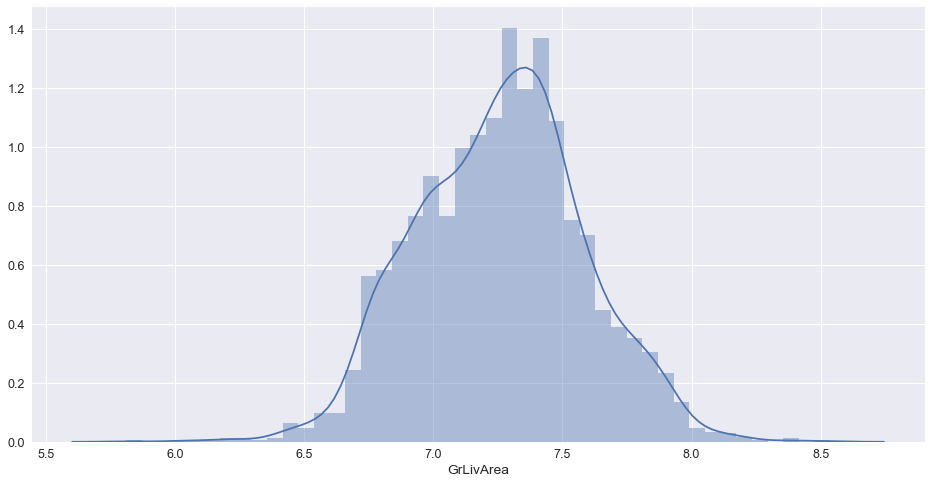

In [79]:
fig, axes = plt.subplots(1,1, figsize=(16, 8))

all_data["GrLivArea"] = np.log(all_data["GrLivArea"])

# It has some positive skenwness before, so now it is much more normalized.
sns.distplot(all_data["GrLivArea"] , ax=axes)

Let's do a few more features.

In [80]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MasVnrArea,2.621719
SalePrice,1.879360
1stFlrSF,1.257286
LotFrontage,1.097235
BsmtFinSF1,0.980645
TotRmsAbvGrd,0.749232
Fireplaces,0.725278
TotalBsmtSF,0.671751
OverallQual,0.189591
FullBath,0.165514


In [81]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 14 skewed numerical features to Box Cox transform


## Create dummy variables

In [82]:
all_data = pd.get_dummies(all_data)

datasets[0] = all_data.iloc[:ntrain]
datasets[1] = all_data.iloc[ntrain:]
datasets[1].drop("SalePrice", inplace=True, axis=1)

print(datasets[0].shape)
print(datasets[1].shape)

(1458, 14)
(1459, 13)


## Let's start applying some models to our algorithm.

In [83]:
#Machine Learning Algorithm (MLA) Selection and Initialization
#These are better for classification
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

MLA = [
    lasso,
    ENet,
    KRR,
    #My current computer is too slow to run this.
    #GBoost
    ]

train = datasets[0]
#create table to compare MLA predictions
MLA_predict = train["SalePrice"]

train = train.drop("SalePrice", axis=1)

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [84]:
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train, MLA_predict, cv  = cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train, MLA_predict)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,KernelRidge,"{'alpha': 0.6, 'coef0': 2.5, 'degree': 2, 'gam...",0.889067,0.872581,0.0470289,0.0534136
0,Pipeline,"{'memory': None, 'steps': [('robustscaler', Ro...",0.864448,0.859437,0.0402525,0.00576923
1,Pipeline,"{'memory': None, 'steps': [('robustscaler', Ro...",0.864448,0.859433,0.0402549,0.00619383


## Generate output file.

In [85]:
y_pred = lasso.predict(datasets[1])

submit_data = pd.read_csv("train.csv")

submission = pd.DataFrame({
    "Id": final_id_column,
    "SalePrice": y_pred
})

submission.to_csv('submission.csv', index=False)